# Worldbank Data on Region

Using data comes from below regions:

* North America
* European Union
* South Asia

Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
na_df = pd.read_csv('data/NorthAmerica-worldbank-data/NorthAmerica_data.csv',skiprows=3)
eu_df = pd.read_csv('data/EuropeanUnion-worldbank-data/EuropeanUnion_data.csv',skiprows=3)
sa_df = pd.read_csv('data/SouthAsia-worldbank-data/SouthAsia_data.csv',skiprows=3)
na_df

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,North America,NAC,"Internally displaced persons, new displacement...",VC.IDP.NWDS,NaN,NaN,NaN,NaN,NaN,NaN,...,9.010000e+05,3.080000e+05,3.980000e+04,7.600000e+04,1.200000e+06,1.771000e+06,1.266000e+06,9.570000e+05,1.740050e+06,NaN
1,North America,NAC,Merchandise exports to low- and middle-income ...,TX.VAL.MRCH.R3.ZS,13.308599,12.823959,11.921267,11.129143,11.457571,10.817422,...,1.846202e+01,1.862607e+01,1.879614e+01,1.899456e+01,1.880176e+01,1.886043e+01,1.912085e+01,1.874249e+01,NaN,NaN
2,North America,NAC,Medium and high-tech exports (% manufactured e...,TX.MNF.TECH.ZS.UN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,North America,NAC,Merchandise imports from low- and middle-incom...,TM.VAL.MRCH.OR.ZS,26.444098,25.383333,24.621123,24.381797,23.792258,21.176526,...,4.604858e+01,4.558559e+01,4.521072e+01,4.628765e+01,4.679283e+01,4.757890e+01,4.738733e+01,4.576980e+01,NaN,NaN
4,North America,NAC,"Tariff rate, applied, simple mean, primary pro...",TM.TAX.TCOM.SM.AR.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,North America,NAC,"Transport services (% of service exports, BoP)",BX.GSR.TRAN.ZS,NaN,NaN,NaN,NaN,NaN,NaN,...,1.314795e+01,1.277806e+01,1.227282e+01,1.130387e+01,1.082568e+01,1.073384e+01,1.105655e+01,1.060698e+01,8.365044e+00,NaN
1439,North America,NAC,"Portfolio investment, net (BoP, current US$)",BN.KLT.PTXL.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1440,North America,NAC,"Charges for the use of intellectual property, ...",BM.GSR.ROYL.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,4.597319e+10,4.710626e+10,4.928592e+10,4.591925e+10,5.354993e+10,5.624763e+10,5.546758e+10,5.481847e+10,5.669066e+10,NaN
1441,North America,NAC,Rural land area (sq. km),AG.LND.TOTL.RU.K2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Create a helper method for searching indicators of interest

In [1]:
def find_rows(df,interest):
    for i in range(len(df)):
        indicator = df.iloc[i]['Indicator Name']
        if interest in indicator:
            print(i,indicator)

In [32]:
find_rows(na_df,'renewables and waste')

547 Combustible renewables and waste (% of total energy)


In [34]:
find_rows(na_df, 'Public private partnerships investment in energy')

564 Public private partnerships investment in energy (current US$)


## Comparing combustible renewables and waste

In [35]:
find_rows(na_df,'Combustible renewables and waste (% of total energy)')
find_rows(eu_df,'Combustible renewables and waste (% of total energy)')
find_rows(sa_df,'Combustible renewables and waste (% of total energy)')

547 Combustible renewables and waste (% of total energy)
309 Combustible renewables and waste (% of total energy)
533 Combustible renewables and waste (% of total energy)


## Plot the data

Text(0.5, 1.0, ' Combustible renewables and waste (% of total energy) ')

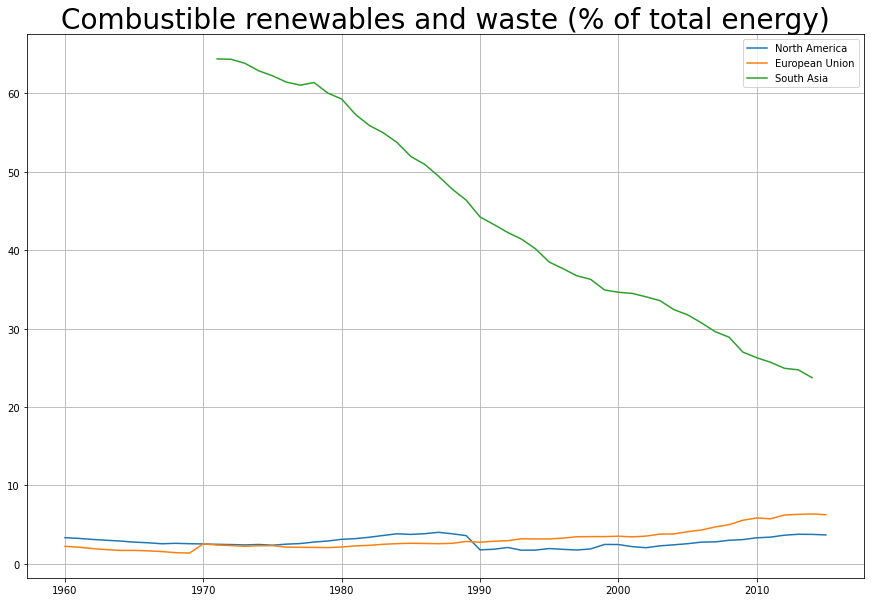

In [31]:
def plot_indicator(df,row,label):
    plt.plot(range(1960,2021),df.iloc[row]['1960':'2020'],label=label)
plt.figure(figsize=(15,10))
plot_indicator(na_df,547,'North America')
plot_indicator(eu_df,309,'European Union')
plot_indicator(sa_df,533,'South Asia')
plt.legend()
plt.grid()
plt.title(' Combustible renewables and waste (% of total energy) ',fontsize = 28)